Copyright (c) 2017, Johannes Schöneberg All rights reserved.
The default copyright laws apply.

In [2]:
# by Joh Schöneberg 2018

%matplotlib inline

#pip install lvm_read
import lvm_read
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

import scipy.ndimage




%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

#own modules / functions
import sys
pythonPackagePath = "/Users/johannesschoeneberg/git/pyLattice/src/python/"
sys.path.append(pythonPackagePath+"/modules")
import InputProcessing as inproc

In [3]:
def ma(a, n=1000) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:]/n

In [4]:
def getLVMdatetime(lvmTimeString,lvmDateString):
    dateString = lvmDateString
    dateSplit=dateString.split('/')
    

    timeString = lvmTimeString
    timeSplit=timeString.split(':')

    #test = datetime.datetime(2017, 6, 26, 18, 21, 16, 533499)
    # this is the time the file was r
    test = datetime.datetime(int(dateSplit[0]), 
                         int(dateSplit[1]), 
                         int(dateSplit[2]), 
                         int(timeSplit[0]), 
                         int(timeSplit[1]), 
                         int(timeSplit[2].split('.')[0]), 
                        0)
    
    #print(test.strftime('%Y-%m-%d %H:%M:%S'))
    return test

In [5]:
def readForceFile(filename):
    lvm = lvm_read.read("./"+infilename, read_from_pickle=False)
    #print(lvm['Description'])
    
    datetime = getLVMdatetime(lvm[0]['Time'][0],lvm[0]['Date'][0])
    
    data = lvm[0]['data']
    t = data[:,0]
    x = data[:,1]
    y = data[:,2]
    xforceraw = data[:,3]
    yforceraw = data[:,4]
    
    return [t,x,y,datetime,xforceraw,yforceraw]

In [6]:
def getTrajectoryIndexOfTimePoint(timepoint):
    return np.where(np.round(t)==timepoint)[0][0]


In [7]:
# this function puts zeros in all positions after the scission event
def cleanForceFileAfterBreak(forceTrajectory,breakTime):
    newTrace = []
    idx = getTrajectoryIndexOfTimePoint(breakTime)
    for i in range(0,len(forceTrajectory)):
        if(i>=idx):
            newTrace.append(0)
        else:
            newTrace.append(forceTrajectory[i])
    return np.array(newTrace)

Text(0,0.5,'force [pN]')

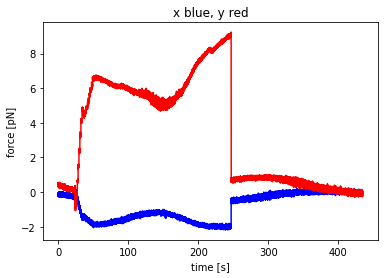

In [16]:
id = 66
infilename = "input/measurement__0"+str(id)+".lvm"

t,x,y,forceFileTimeCreated,xforceraw,yforceraw = readForceFile(infilename)


plt.plot(t,scipy.ndimage.median_filter(x,50),c="b")
plt.plot(t,scipy.ndimage.median_filter(y,50),c="r")
plt.title("x blue, y red")
plt.xlabel("time [s]")
plt.ylabel("force [pN]")

# Laser and other Parameters

In [17]:
 lvm = lvm_read.read("./"+infilename, read_from_pickle=False)
#print(lvm['Description'])

#datetime = getLVMdatetime(lvm[0]['Time'][0],lvm[0]['Date'][0])

data = lvm[0]['data']
t = data[:,0]
xForce = data[:,1]
yForce = data[:,2]
xForceRaw = data[:,3]
yForceRaw = data[:,4]
a_voltage = data[:,5]
b_voltage = data[:,6]
c_voltage = data[:,7]
d_voltage = data[:,8]

Text(0,0.5,'force [pN]')

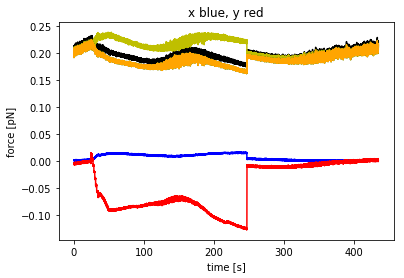

In [18]:
#plt.plot(t,scipy.ndimage.median_filter(xForce,50),c="b")
#plt.plot(t,scipy.ndimage.median_filter(yForce,50),c="r")
plt.plot(t,scipy.ndimage.median_filter(xForceRaw,50),c="b")
plt.plot(t,scipy.ndimage.median_filter(yForceRaw,50),c="r")
plt.plot(t,scipy.ndimage.median_filter(a_voltage,50),c="k")
plt.plot(t,scipy.ndimage.median_filter(b_voltage,50),c="y")
plt.plot(t,scipy.ndimage.median_filter(c_voltage,50),c="g")
plt.plot(t,scipy.ndimage.median_filter(c_voltage,50),c="orange")

plt.title("x blue, y red")
plt.xlabel("time [s]")
plt.ylabel("force [pN]")

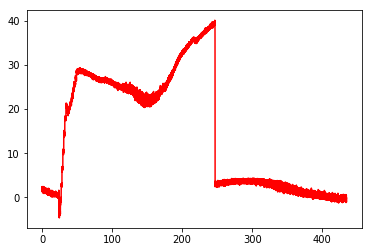

In [19]:
alphay = 1830
kappay = 0.2023

alphay = 1571
kappay = 0.1989
plt.plot(t,scipy.ndimage.median_filter(-alphay*kappay*yForceRaw,50),c="r")

In [20]:
#forceScale = 4
forceScale = -1519*0.1992
time_UV = 150 #seconds after the force file was created
breakTime = 247 #second that the tube breaks
xlimit = (-180,220)
y = yForceRaw

zoomTime0 = 0
zoomTime1 = 350

0 565847


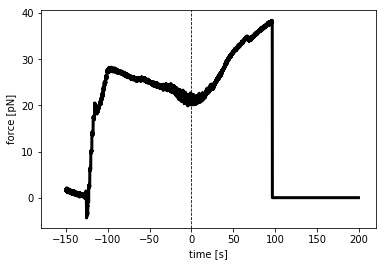

In [21]:
# rescaling approx..

idx0 = getTrajectoryIndexOfTimePoint(zoomTime0)
idx1 = getTrajectoryIndexOfTimePoint(zoomTime1)
print(idx0,idx1)

#fig = plt.figure(figsize=(6, 4), dpi=100)
#fig = plt.figure( dpi=150)

cleanedTrace = scipy.ndimage.median_filter(cleanForceFileAfterBreak(yForceRaw,breakTime)[idx0:idx1],100)

plt.plot(t[idx0:idx1]-time_UV,forceScale*cleanedTrace,c='k',lw=3)
plt.xlabel("time [s]")
plt.ylabel("force [pN]")
plt.axvline(0, color='k', linestyle='--', lw=0.8)
plt.xlim(xlimit[0],xlimit[1])
plt.show()

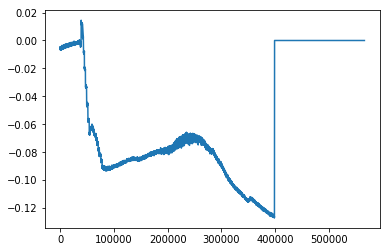

In [22]:
cleanedTrace = scipy.ndimage.median_filter(cleanForceFileAfterBreak(y,breakTime)[idx0:idx1],100)
plt.plot(cleanedTrace)

# fit the baseline and adjust the rest accordingly

In [23]:
def plotTraceTime(t,y,idx0=-1,idx1=-1):
    cleanedTrace = scipy.ndimage.median_filter(cleanForceFileAfterBreak(y,breakTime)[idx0:idx1],100)

    plt.plot(t[idx0:idx1],forceScale*cleanedTrace,c='k',lw=3)
    plt.xlabel("time [s]")
    plt.ylabel("force [pN]")

#    plt.xlim(time[idxfrom-1000],time[idxto+1000])
    plt.show()

78813 241109


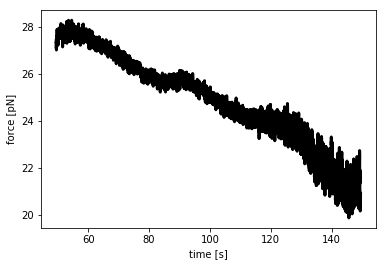

In [24]:
#manually adjust this value

UV_startTime = time_UV

baseline_idx0 = getTrajectoryIndexOfTimePoint(50)
baseline_idx1 = getTrajectoryIndexOfTimePoint(UV_startTime)

print(baseline_idx0,baseline_idx1)
plotTraceTime(t,y,baseline_idx0,baseline_idx1)


UV_5minAfterTime = UV_startTime+0.7*60
#UV_10minAfterStartTime = UV_startTime+10*60
#UV_15minAfterStartTime = UV_startTime+15*60

UV_startIndex = getTrajectoryIndexOfTimePoint(UV_startTime)
UV_5minAfterStart = getTrajectoryIndexOfTimePoint(UV_5minAfterTime)
#UV_10minAfterStart = np.where(np.round(time,0)==UV_10minAfterStartTime)[0][0]
#UV_15minAfterStart = np.where(np.round(time,0)==UV_15minAfterStartTime)[0][0]

In [25]:
# fit the baseline
# http://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy
def fitBaselineLinear(t,y,idx0,idx1):

    time = t
    force = y
    
    
    x = time[idx0:idx1]
    y = force[idx0:idx1]
    
    fit_baseline = np.polyfit(x,y,1)
    fit_fn_baseline = np.poly1d(fit_baseline) 
    # fit_fn is now a function which takes in x and returns an estimate for y
    

    
    def fn(x):
        return np.multiply(fit_fn_baseline[0],x)+fit_fn_baseline[1]
    
    #plt.plot(x,y, '-', x, fit_fn_baseline(x), '--k')
    #plt.show()
    return(fit_baseline)



#plotTraceTime(fileData,idx0,idx1)

Text(0,0.5,'force[pN]')

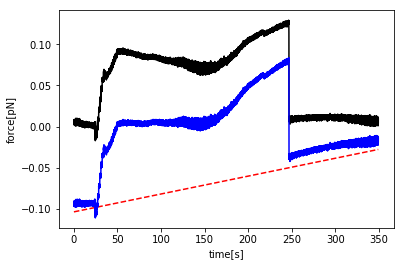

In [26]:
baselineFit = fitBaselineLinear(t,y,baseline_idx0,baseline_idx1)

time = t
force = y

whole_idx0 = idx0
whole_idx1 = idx1

xx = time[whole_idx0:whole_idx1]
yy = force[whole_idx0:whole_idx1]

fit_fn_baseline = np.poly1d(baselineFit) 
# fit_fn is now a function which takes in x and returns an estimate for y

ws = 20
plt.plot(scipy.ndimage.median_filter(xx,ws),-1*scipy.ndimage.median_filter(yy,ws), '-k', xx, fit_fn_baseline(xx), '--r')
delta= yy[0]-fit_fn_baseline(xx[0])
delta = 0


plt.plot(scipy.ndimage.median_filter(xx,ws),-1*scipy.ndimage.median_filter(yy[0]+yy-fit_fn_baseline(xx)-delta,ws), '-b')
plt.xlabel("time[s]")
plt.ylabel("force[pN]")



0 565847
0.099168002481


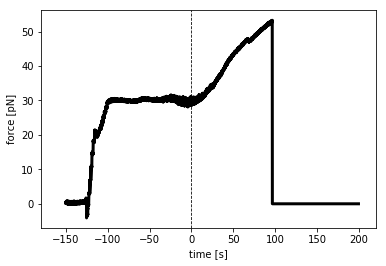

In [27]:
# rescaling approx..

idx0 = getTrajectoryIndexOfTimePoint(zoomTime0)
idx1 = getTrajectoryIndexOfTimePoint(zoomTime1)
print(idx0,idx1)

#fig = plt.figure(figsize=(6, 4), dpi=100)
#fig = plt.figure( dpi=150)
#plt.plot(scipy.ndimage.median_filter(xx,ws),
#         
#         scipy.ndimage.median_filter(yy[0]+yy-fit_fn_baseline(t[idx0:idx1]),ws)

time = t[idx0:idx1]
trace = cleanForceFileAfterBreak(y,breakTime)[idx0:idx1]
fittedTrace = fit_fn_baseline(t[idx0:idx1])

#cleanedTrace = scipy.ndimage.median_filter(cleanForceFileAfterBreak(y,breakTime)[idx0:idx1]-fit_fn_baseline(t[idx0:idx1]),100)

#plt.plot(time,trace)
#plt.plot(time,fittedTrace)
#plt.plot(time,trace-fittedTrace)

#plt.plot(time,cleanForceFileAfterBreak(trace-fittedTrace,breakTime))

correctedTrace = y-fit_fn_baseline(t)
print(correctedTrace[0])
#plt.plot(t,cleanForceFileAfterBreak(correctedTrace-correctedTrace[0],breakTime))

timeSlice = t[idx0:idx1]
traceSlice = cleanForceFileAfterBreak((correctedTrace-correctedTrace[0]),breakTime)[idx0:idx1]
plt.plot(timeSlice-time_UV,forceScale*scipy.ndimage.median_filter(traceSlice,100),c='k',lw=3)
plt.xlabel("time [s]")
plt.ylabel("force [pN]")
plt.axvline(0, color='k', linestyle='--', lw=0.8)
plt.xlim(xlimit[0],xlimit[1])
plt.show()




In [28]:
fhat=np.max(forceScale*scipy.ndimage.median_filter(traceSlice,100))
time0=-90
baseline_idx0 = np.where(np.round(timeSlice-time_UV)==time0)[0][0]
time1=-50
baseline_idx1 = np.where(np.round(timeSlice-time_UV)==time1)[0][0]
fzero=np.average(forceScale*scipy.ndimage.median_filter(traceSlice,100)[baseline_idx0:baseline_idx1])
print(fzero,fhat)

30.0796327122 53.2983125979


In [29]:
out_time = timeSlice-time_UV
out_force = forceScale*scipy.ndimage.median_filter(traceSlice,100)
output_data = np.transpose(np.asarray((out_time,out_force)))

UV_startTime 150
baselineForce 30.11
maxForce 53.3
∆F 23.19


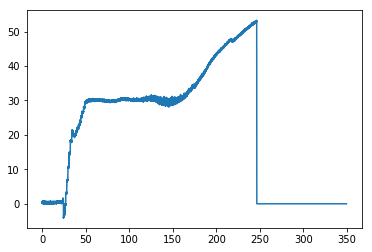

In [30]:
plt.plot(timeSlice,out_force)
print("UV_startTime",UV_startTime)
baseline_idx0 = getTrajectoryIndexOfTimePoint(80)
baseline_idx1 = getTrajectoryIndexOfTimePoint(UV_startTime)
baselineForce = np.average(out_force[baseline_idx0:baseline_idx1])
maxForce = np.max(out_force)
print("baselineForce",np.round(baselineForce,2))
print("maxForce",np.round(maxForce,2))
print("∆F",np.round(maxForce-baselineForce,2))

In [33]:
## OUTPUT
with open('./output/out_tube_force.csv','wb') as f:
    np.savetxt(f, 
           output_data, 
           delimiter=',',
           fmt='%10.5f',
           header="time[s], force[pN]"
              ) 